In [65]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

In [118]:
ruta_imagen = "WhatsApp Image 2024-12-07 at 1.24.52 PM.jpeg"
tamaño_referencia_nm=114.10
escala_referencia_px=50

In [106]:
from PIL import Image

# Intentar abrir la imagen con Pillow
try:
    imagen = Image.open(ruta_imagen)
    imagen.show()  # Muestra la imagen si se abre correctamente
    print("Imagen cargada correctamente.")
except Exception as e:
    print(f"Error al cargar la imagen con Pillow: {e}")

Imagen cargada correctamente.


In [119]:
# Cargar la imagen en escala de grises
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

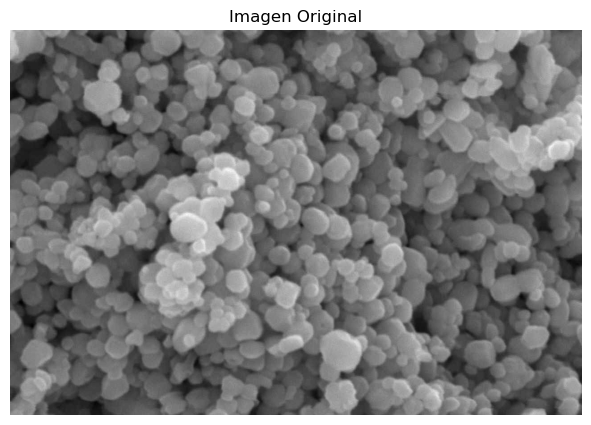

In [120]:
# Mostrar la imagen original
plt.figure(figsize=(10, 5))
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.show()

In [121]:
 # Aplicar un filtro para reducir ruido
imagen_suavizada = cv2.GaussianBlur(imagen, (15, 15), 0)
 # Umbral adaptativo para binarizar la imagen
imagen_binaria = cv2.adaptiveThreshold(imagen_suavizada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Realizar dilatación para agrandar las partículas
kernel = np.ones((5, 5), np.uint8)
imagen_dilatada = cv2.dilate(imagen_binaria, kernel, iterations=2)

# Detectar contornos
contornos, _ = cv2.findContours(imagen_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos pequeños
contornos = [c for c in contornos if cv2.contourArea(c) > 20]

In [122]:
# Dibujar contornos sobre la imagen original
imagen_contornos = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imagen_contornos, contornos, -1, (0, 500, 0), 2)

array([[[180, 180, 180],
        [176, 176, 176],
        [170, 170, 170],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       [[177, 177, 177],
        [173, 173, 173],
        [167, 167, 167],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73]],

       [[175, 175, 175],
        [171, 171, 171],
        [165, 165, 165],
        ...,
        [ 78,  78,  78],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       ...,

       [[109, 109, 109],
        [111, 111, 111],
        [115, 115, 115],
        ...,
        [ 49,  49,  49],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[114, 114, 114],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[117, 117, 117],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

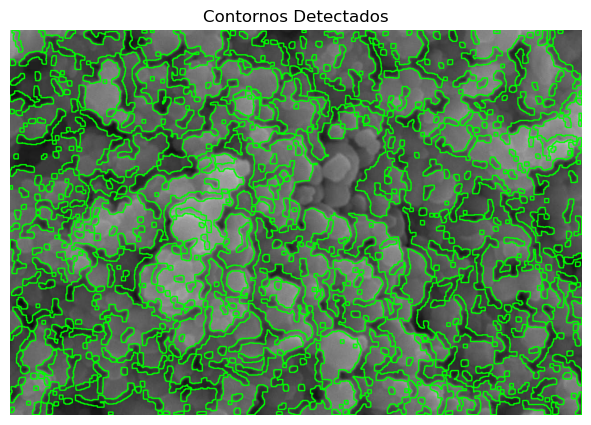

In [123]:
 # Mostrar la imagen con contornos
plt.figure(figsize=(10, 5))
plt.title("Contornos Detectados")
plt.imshow(imagen_contornos)
plt.axis('off')
plt.show()

In [124]:
  # Calcular el tamaño de las partículas detectadas
tamaños_particulas_nm = []
for contorno in contornos:
    # Calcular el área en píxeles
    area_px = cv2.contourArea(contorno)

    # Calcular el diámetro equivalente (asumiendo partículas circulares)
    diametro_px = np.sqrt(4 * area_px / np.pi)

    if escala_referencia_px:
        # Convertir de píxeles a nanómetros
        diametro_nm = (diametro_px / escala_referencia_px) * tamaño_referencia_nm
        tamaños_particulas_nm.append(diametro_nm)

In [125]:
if escala_referencia_px:
    # Mostrar tamaños calculados
    print("Tamaños de nanopartículas detectados (en nm):")
    for i, tamaño in enumerate(tamaños_particulas_nm):
        print(f"Partícula {i+1}: {tamaño:.2f} nm")
else:
    print("No se puede calcular el tamaño sin la escala de referencia.")

Tamaños de nanopartículas detectados (en nm):
Partícula 1: 19.95 nm
Partícula 2: 24.02 nm
Partícula 3: 30.63 nm
Partícula 4: 26.39 nm
Partícula 5: 21.47 nm
Partícula 6: 29.70 nm
Partícula 7: 28.32 nm
Partícula 8: 35.35 nm
Partícula 9: 35.40 nm
Partícula 10: 25.29 nm
Partícula 11: 51.27 nm
Partícula 12: 20.60 nm
Partícula 13: 47.13 nm
Partícula 14: 36.10 nm
Partícula 15: 24.02 nm
Partícula 16: 53.12 nm
Partícula 17: 20.60 nm
Partícula 18: 77.23 nm
Partícula 19: 20.60 nm
Partícula 20: 68.71 nm
Partícula 21: 38.84 nm
Partícula 22: 37.93 nm
Partícula 23: 24.36 nm
Partícula 24: 36.42 nm
Partícula 25: 68.08 nm
Partícula 26: 21.85 nm
Partícula 27: 51.47 nm
Partícula 28: 63.91 nm
Partícula 29: 98.32 nm
Partícula 30: 20.60 nm
Partícula 31: 72.14 nm
Partícula 32: 31.95 nm
Partícula 33: 53.43 nm
Partícula 34: 36.28 nm
Partícula 35: 29.13 nm
Partícula 36: 24.16 nm
Partícula 37: 99.33 nm
Partícula 38: 96.98 nm
Partícula 39: 34.74 nm
Partícula 40: 32.93 nm
Partícula 41: 20.60 nm
Partícula 42: 114.94

In [126]:
# Limpiar los datos para que solo estén en el rango de 0 a 200 nm
tamaños_filtrados = [tamaño for tamaño in tamaños_particulas_nm if 0 <= tamaño <= 200]

In [127]:
fig = go.Figure(data=[go.Histogram(
        x=tamaños_filtrados,
        nbinsx=200,  # Número de barras en el histograma
#         marker=dict(color='rgb(54, 81, 139)'),
    )])

# Personalizar la apariencia de la gráfica
fig.update_layout(
    title='Distribución de Tamaños de Nanopartículas',
    xaxis_title="Tamaño de las nanopartículas (nm)",
    yaxis_title="Frecuencia",
    showlegend=False
)

# Mostrar la gráfica interactiva
pio.show(fig)